Data Discovery

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore')

data_csv = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

data = pd.DataFrame(data_csv)

data.head()



Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [83]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [85]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data Qualtiy

In [86]:
data.duplicated().sum()

0

In [87]:
data['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [88]:
data['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [89]:
data = data.drop(['StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)

In [90]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Data Cleaning & EDA

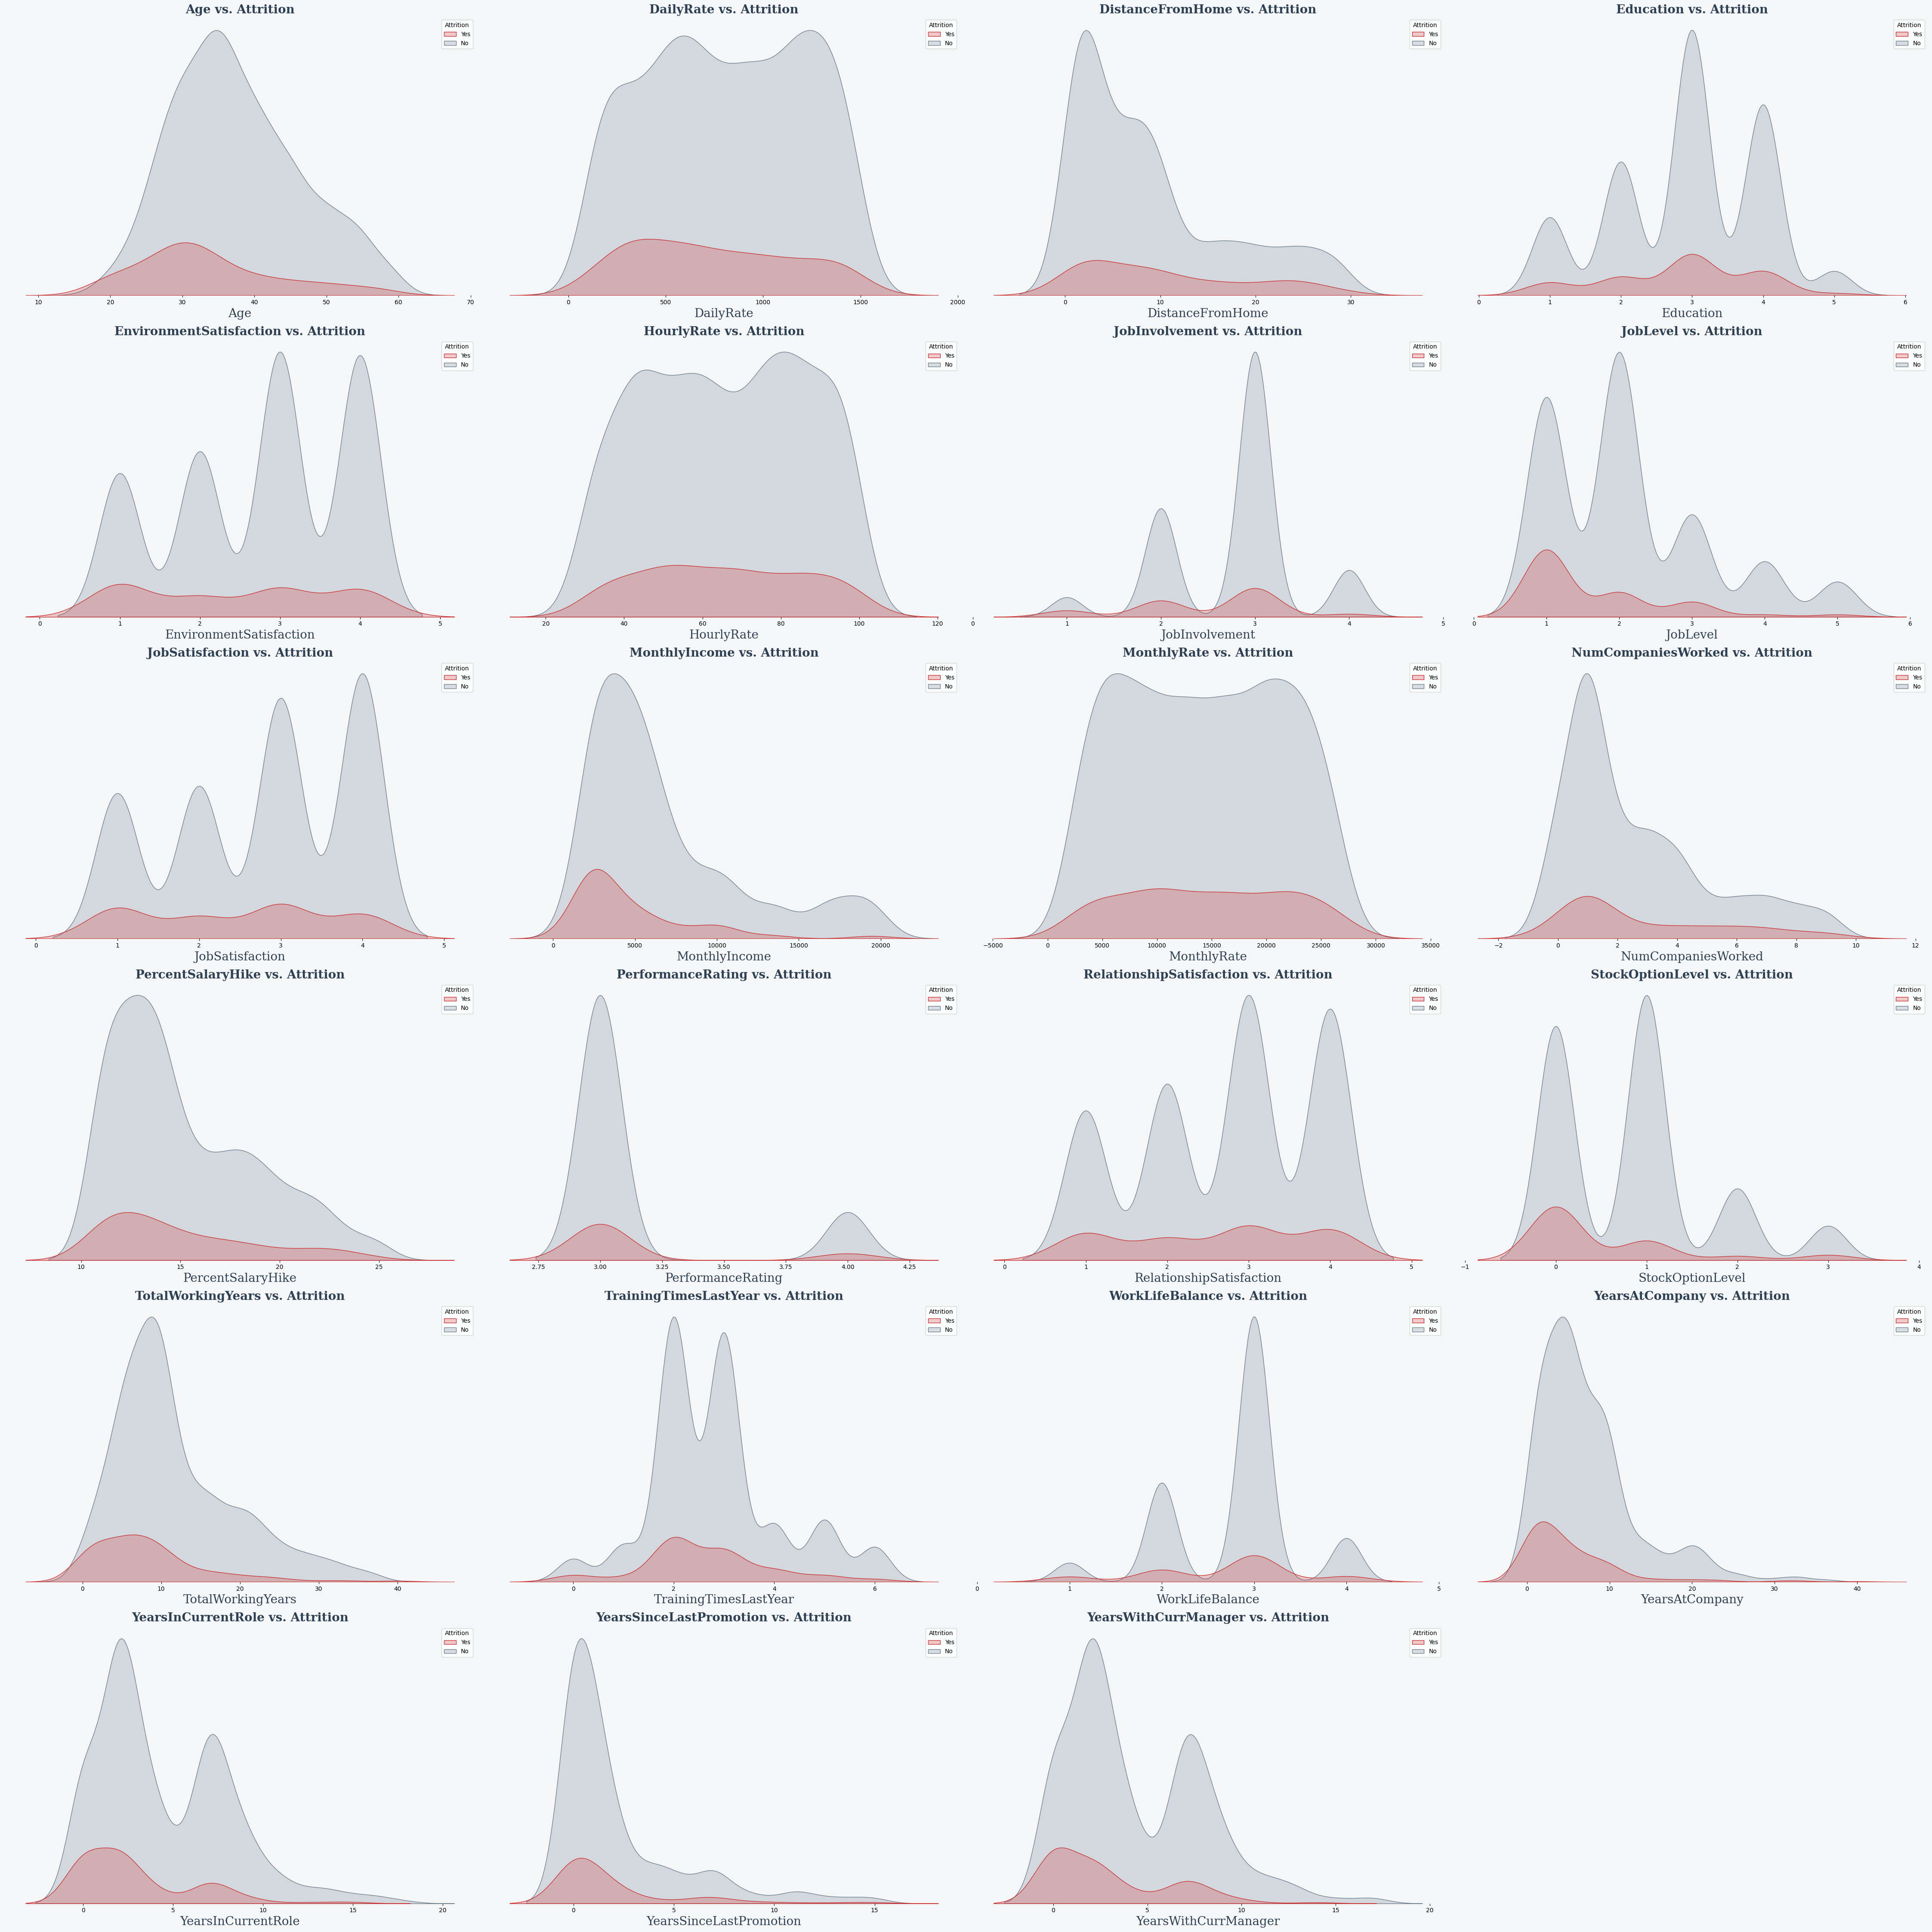

In [ ]:
attrition_color = '#cb3335'
retention_color = '#708090'
background_color = '#F4F6F7'
text_color = '#2E4053'


num_columns = data.select_dtypes(include=['number']).columns


fig, axes = plt.subplots(6, 4, figsize=(45, 9 * 5))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.kdeplot(ax=axes[i], x=col, hue='Attrition', data=data, fill=True, palette=[attrition_color, retention_color])

    
    axes[i].set_title(f'{col} vs. Attrition',
                      fontdict={'font':'Serif', 'color': text_color, 'size': 20, 'weight': 'bold'})

    
    axes[i].set_xlabel(col,
                       fontdict={'font':'Serif', 'color': text_color, 'size': 20, 'weight': 'normal'})
    
    axes[i].set_ylabel('Density',
                       fontdict={'font':'Serif', 'color': text_color, 'size': 20, 'weight': 'normal'})
    
   
    axes[i].set_facecolor(background_color)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].axes.get_yaxis().set_visible(False)
    axes[i].patch.set_facecolor(background_color)

for j in range(len(num_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
fig.patch.set_facecolor(background_color)
plt.show()

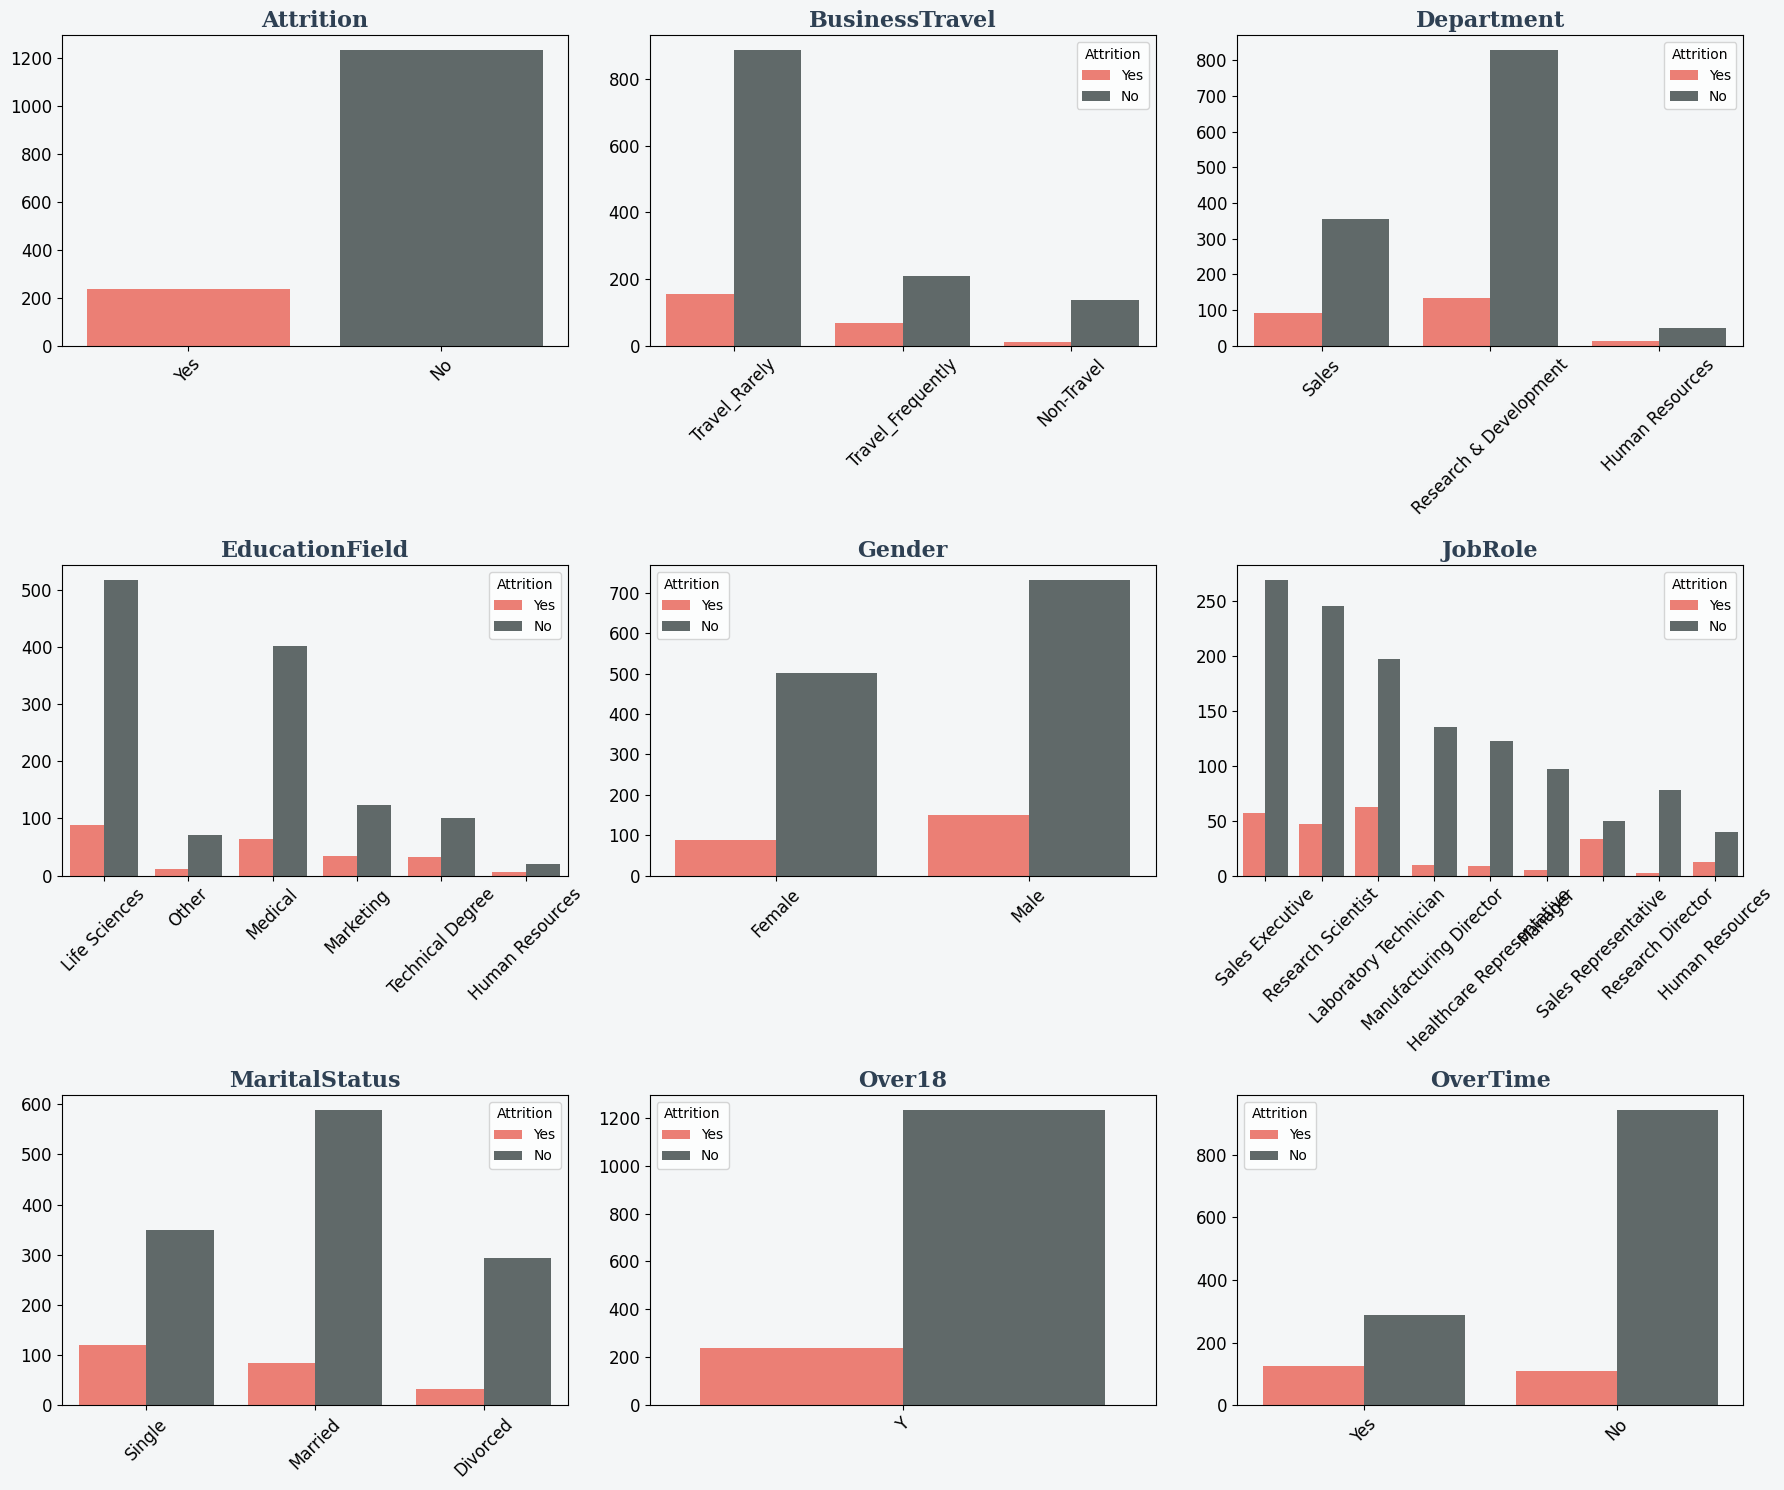

In [ ]:
attrition_color = '#FF6F61'
retention_color = '#5F6A6A'
text_color = '#2E4053'
background_color = '#F4F6F7'

object_columns = data.select_dtypes(include=['object']).columns

num_cols = len(object_columns)
cols = 3  
rows = (num_cols // cols) + (num_cols % cols > 0)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()


for i, col in enumerate(object_columns):
    sns.countplot(ax=axes[i], x=col, data=data, hue='Attrition', palette=[attrition_color, retention_color])
    axes[i].set_title(f'{col}', fontdict={'font': 'Serif', 'color': text_color, 'weight': 'bold', 'size': 16})
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    axes[i].set_facecolor(background_color)


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()

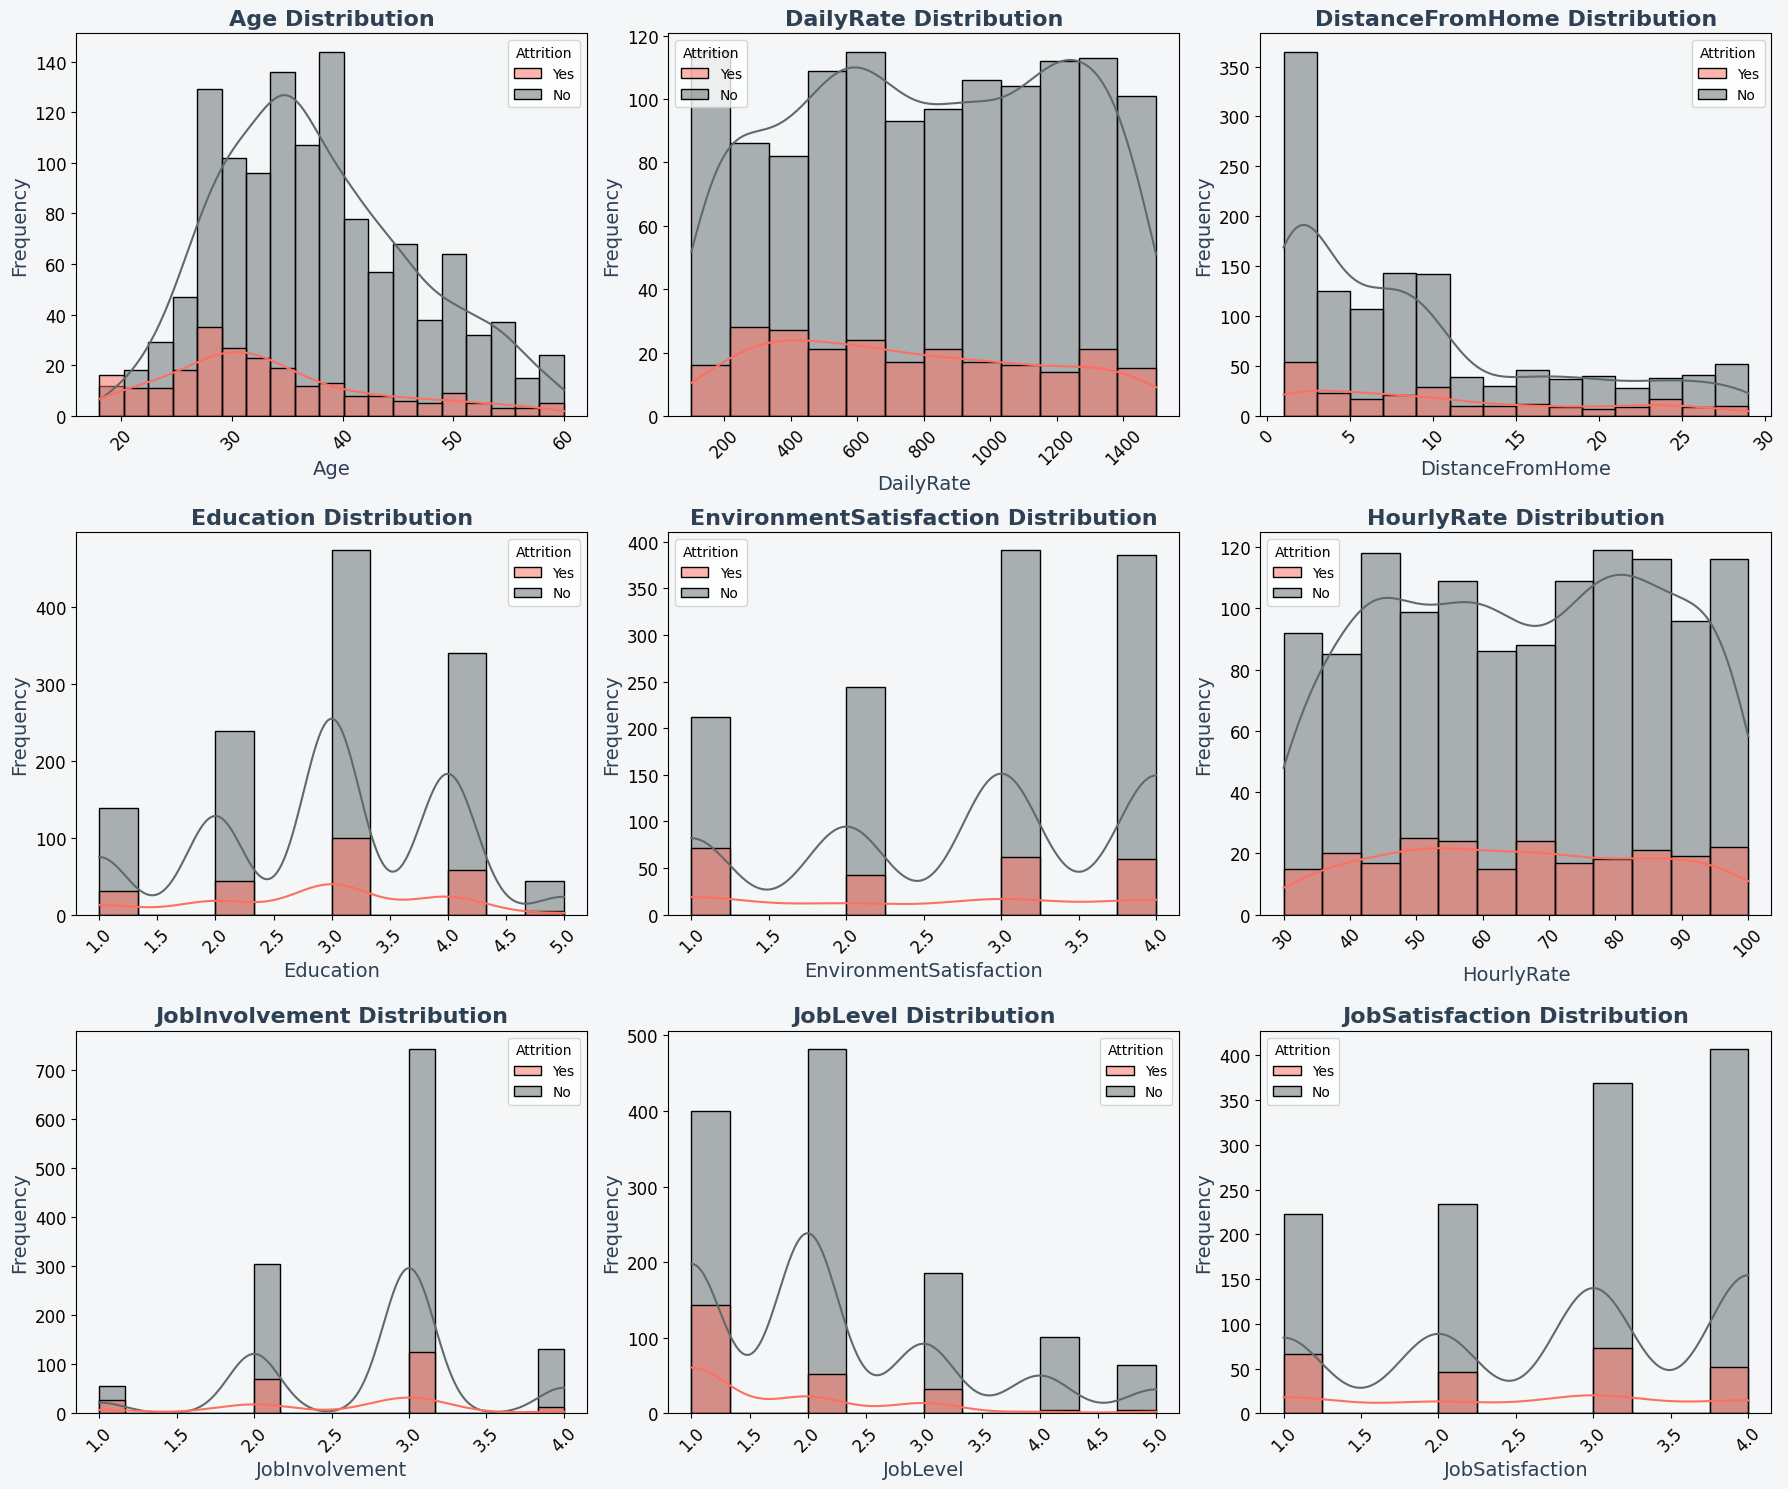

In [93]:
num_columns = data.select_dtypes(include=['number']).columns[:9]

num_cols = 3
rows = 3  

fig, axes = plt.subplots(rows, num_cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(data=data, x=col, hue='Attrition', kde=True, ax=axes[i], palette=[attrition_color, retention_color])
    axes[i].set_title(f'{col} Distribution', fontsize=16, fontweight='bold', color=text_color)
    axes[i].set_xlabel(col, fontsize=14, color=text_color)
    axes[i].set_ylabel('Frequency', fontsize=14, color=text_color)
    axes[i].set_facecolor(background_color)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()


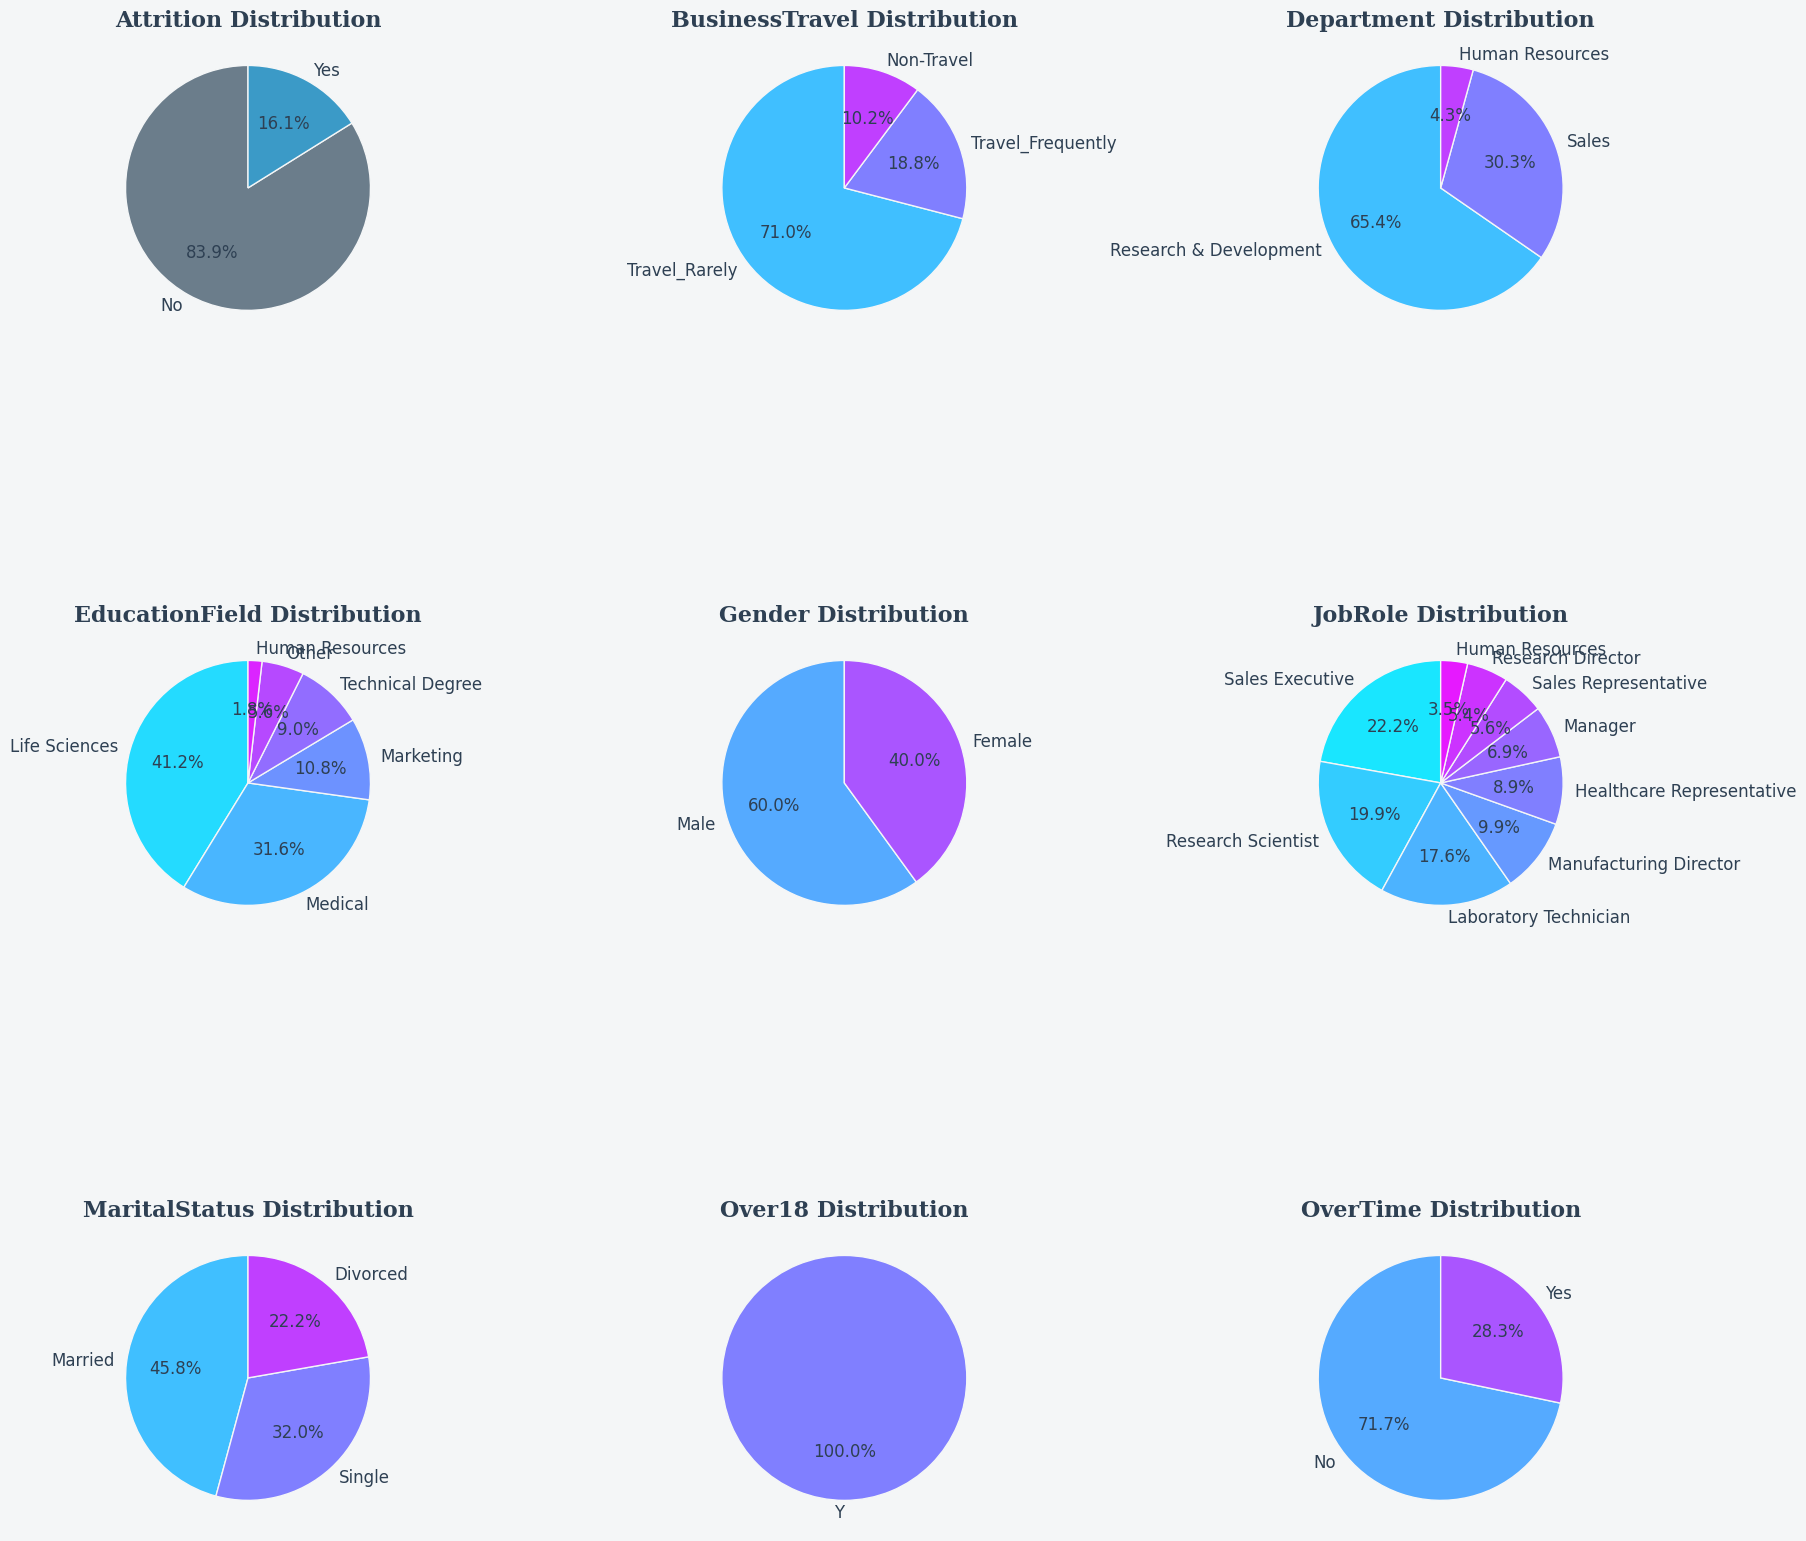

In [94]:
attrition_color = '#3B9AC7'  
retention_color = '#6B7D8B'  
background_color = '#F4F6F7'
text_color = '#2E4053'

object_columns = data.select_dtypes(include=['object']).columns

cols = 3  
rows = (len(object_columns) // cols) + (len(object_columns) % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
axes = axes.flatten()

for i, col in enumerate(object_columns):
    attrition_counts = data[col].value_counts()
    labels = attrition_counts.index
    sizes = attrition_counts.values

    if col == 'Attrition':
        color_map = [attrition_color if lbl == 'Yes' else retention_color for lbl in labels]
    else:
        color_map = sns.color_palette("cool", len(labels))

    axes[i].pie(
        sizes,
        labels=labels,
        colors=color_map,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 12, 'color': text_color},
        wedgeprops={'edgecolor': background_color}
    )
    axes[i].set_title(f'{col} Distribution', fontdict={'font': 'Serif', 'color': text_color, 'size': 16, 'weight': 'bold'})
    axes[i].set_facecolor(background_color)

for j in range(len(object_columns), len(axes)):
    axes[j].axis('off')

fig.patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()


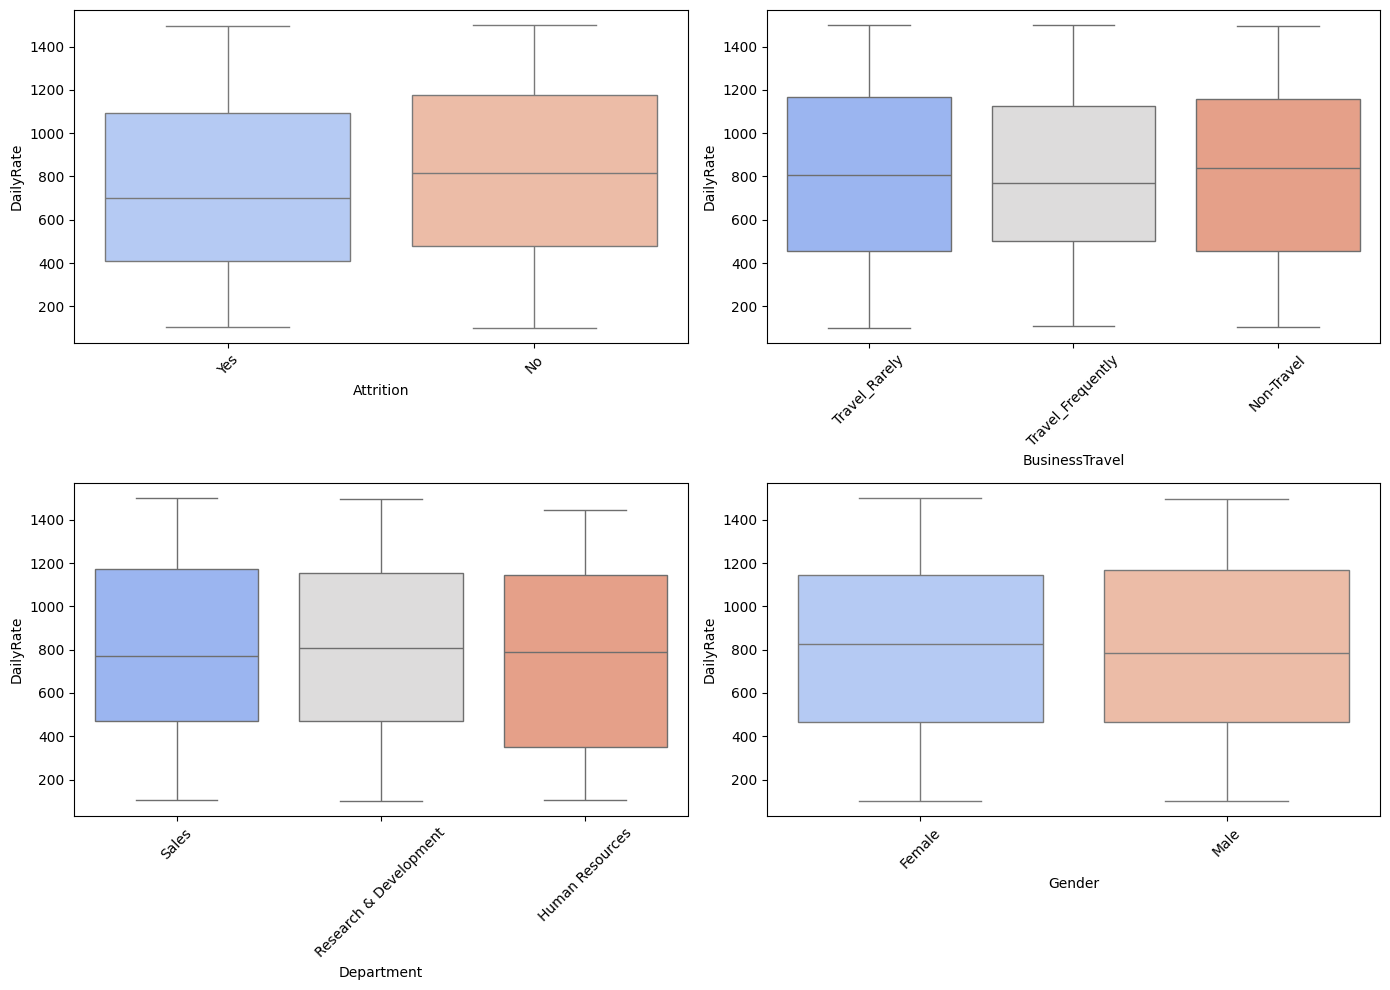

In [95]:
features = ['Attrition', 'BusinessTravel', 'Department', 'Gender']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  
    sns.boxplot(x=feature, y="DailyRate", data=data,
                palette='coolwarm')  
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [96]:
intt = data.select_dtypes(exclude=['object'])
coll = data.select_dtypes(exclude=['object'])

In [97]:
intt['age_cat'] = pd.cut(intt['Age'], bins = [13,18, 45,60], labels = ['Teens', 'Adults','Mid Adults'])
data['TotalWorkingYearscat'] = pd.cut(data['TotalWorkingYears'], bins = [0,10,20, 30,40], labels = ['0-10', '10-20', '20-30','30-40'])
data['MonthlyIncomedcat'] = pd.cut(data['MonthlyIncome'], bins = [0,5000,10000, 15000,20000], labels = ['0-5000', '5000-10000', '10000-15000','15000-20000'])

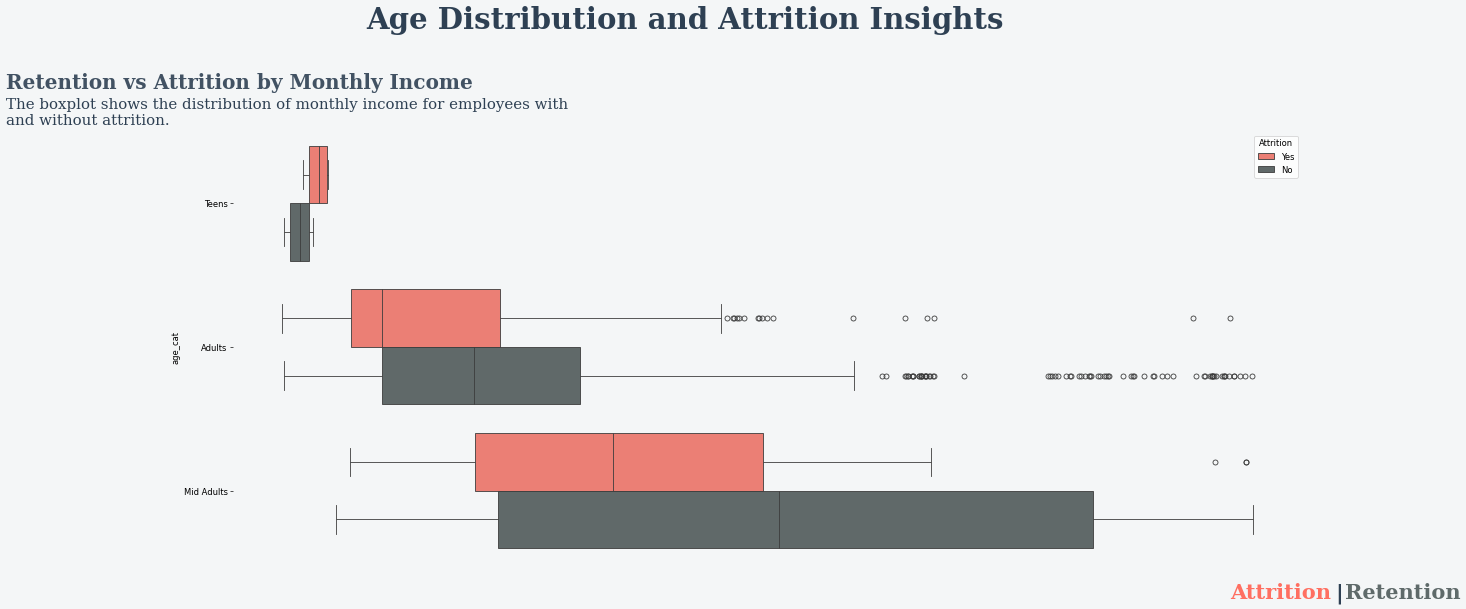

In [ ]:
attrition_color = '#FF6F61'
retention_color = '#5F6A6A'
background_color = '#F4F6F7'
accent_color = '#1d2c8a'
text_color = '#2E4053'

fig = plt.figure(figsize=(24, 10), dpi=60)

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax1 = fig.add_subplot(gs[1:15, 1:])  


axes = [ax1]

for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)


sns.boxplot(x=intt['MonthlyIncome'], y=intt['age_cat'], data=data, hue=data['Attrition'], ax=ax1, palette=[attrition_color, retention_color])

fig.text(0.25, 1, 'Age Distribution and Attrition Insights', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size':35})




fig.text(0, 0.9, 'Retention vs Attrition by Monthly Income', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0, 0.84, 'The boxplot shows the distribution of monthly income for employees with \nand without attrition.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.85, 0.05, 'Attrition', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': attrition_color})
fig.text(0.923, 0.05, '|', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': text_color})
fig.text(0.93, 0.05, 'Retention', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': retention_color})

fig.show()

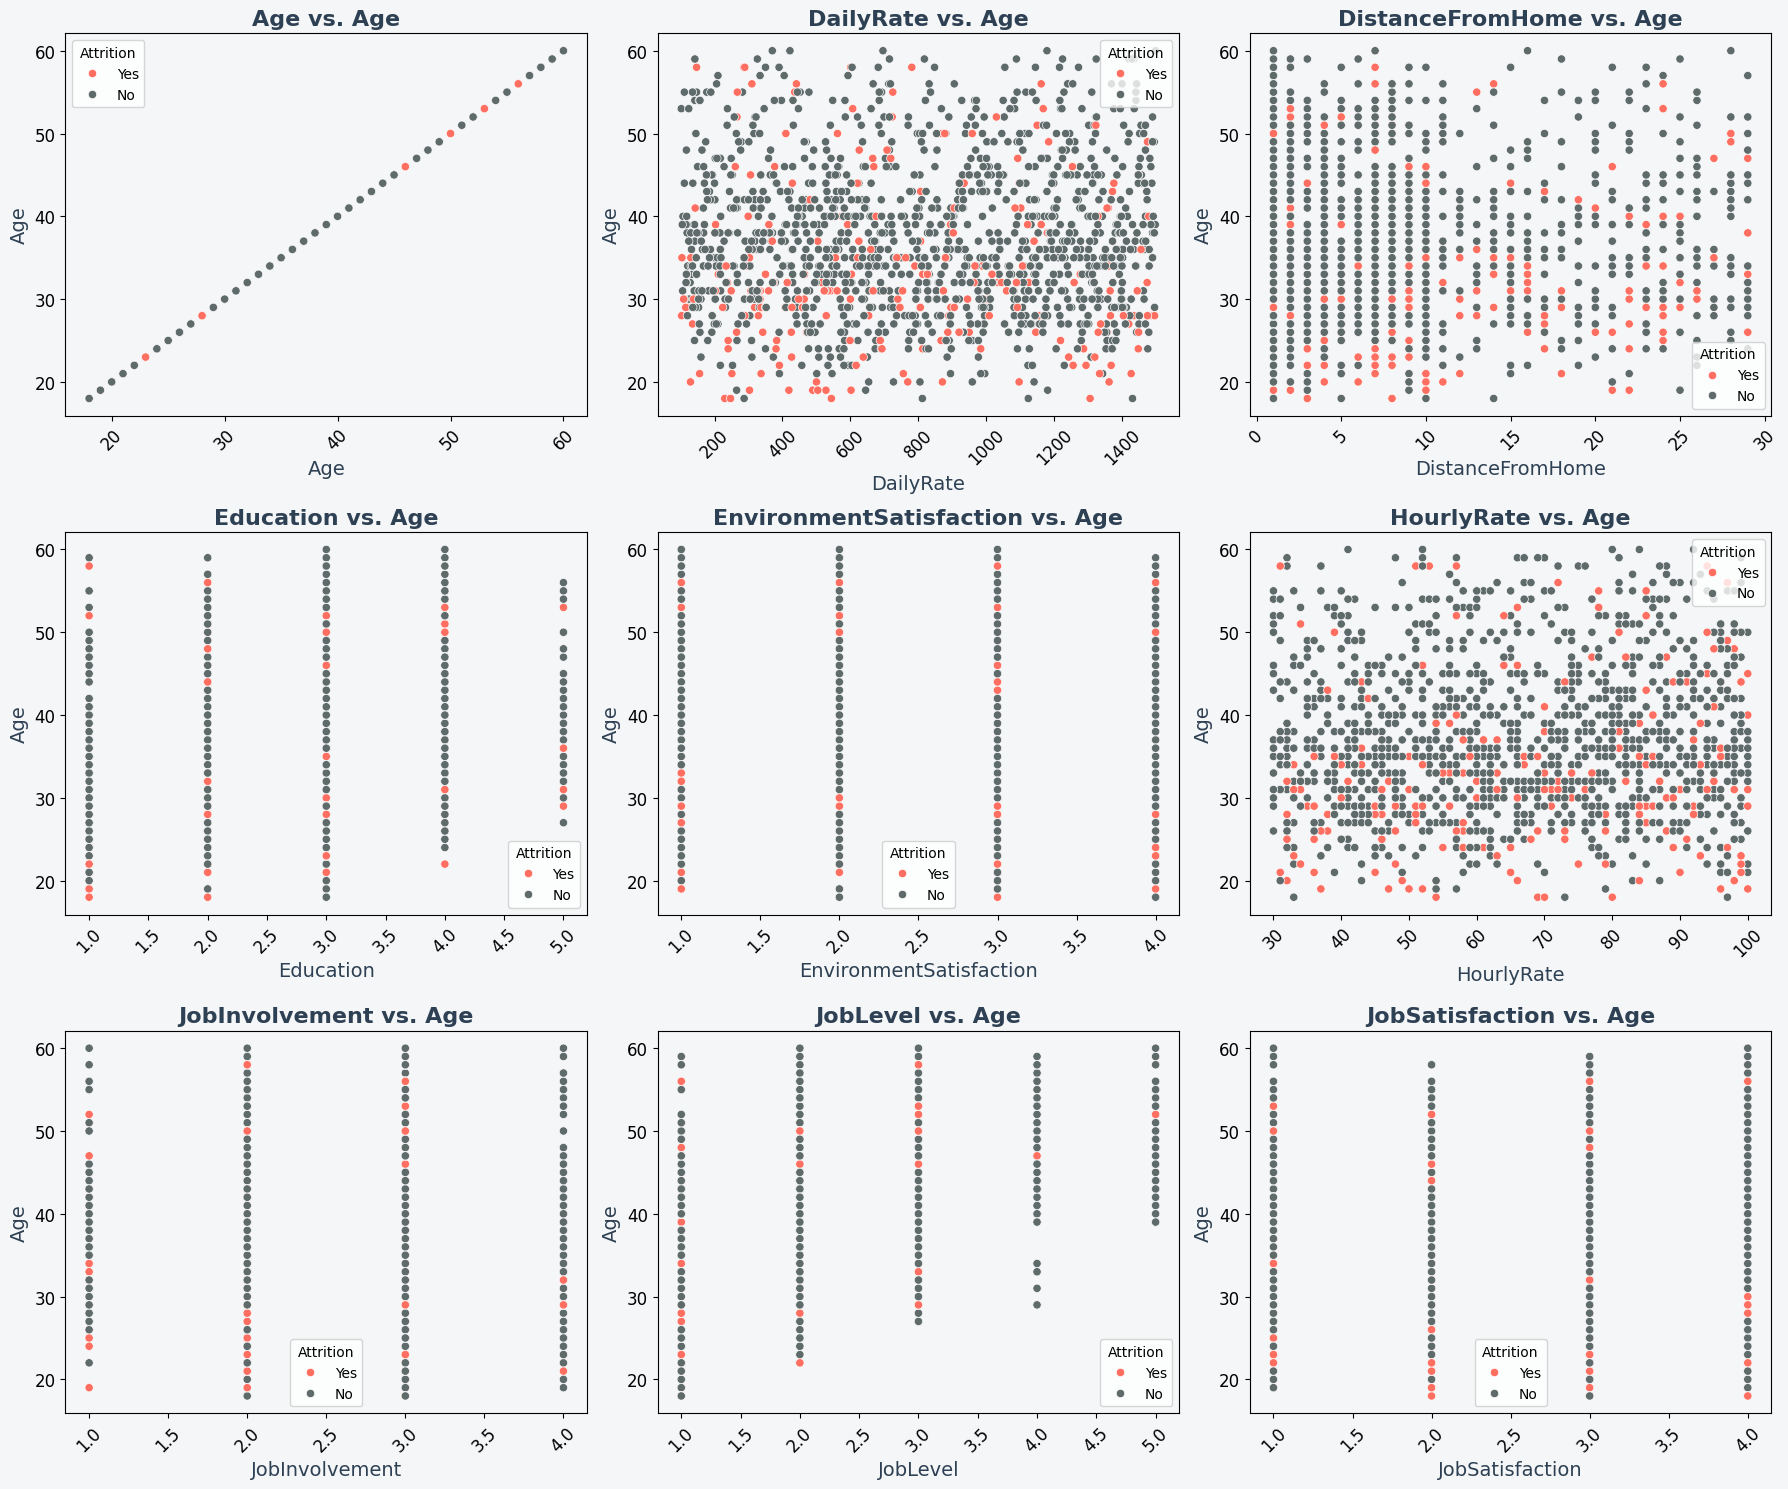

In [99]:
num_columns = data.select_dtypes(include=['number']).columns[:9]

num_cols = 3
rows = 3  

fig, axes = plt.subplots(rows, num_cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.scatterplot(data=data, x=col, y='Age', hue='Attrition', palette=[attrition_color, retention_color], ax=axes[i])
    axes[i].set_title(f'{col} vs. Age', fontsize=16, fontweight='bold', color=text_color)
    axes[i].set_xlabel(col, fontsize=14, color=text_color)
    axes[i].set_ylabel('Age', fontsize=14, color=text_color)
    axes[i].set_facecolor(background_color)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
fig.patch.set_facecolor(background_color)
plt.tight_layout()
plt.show()


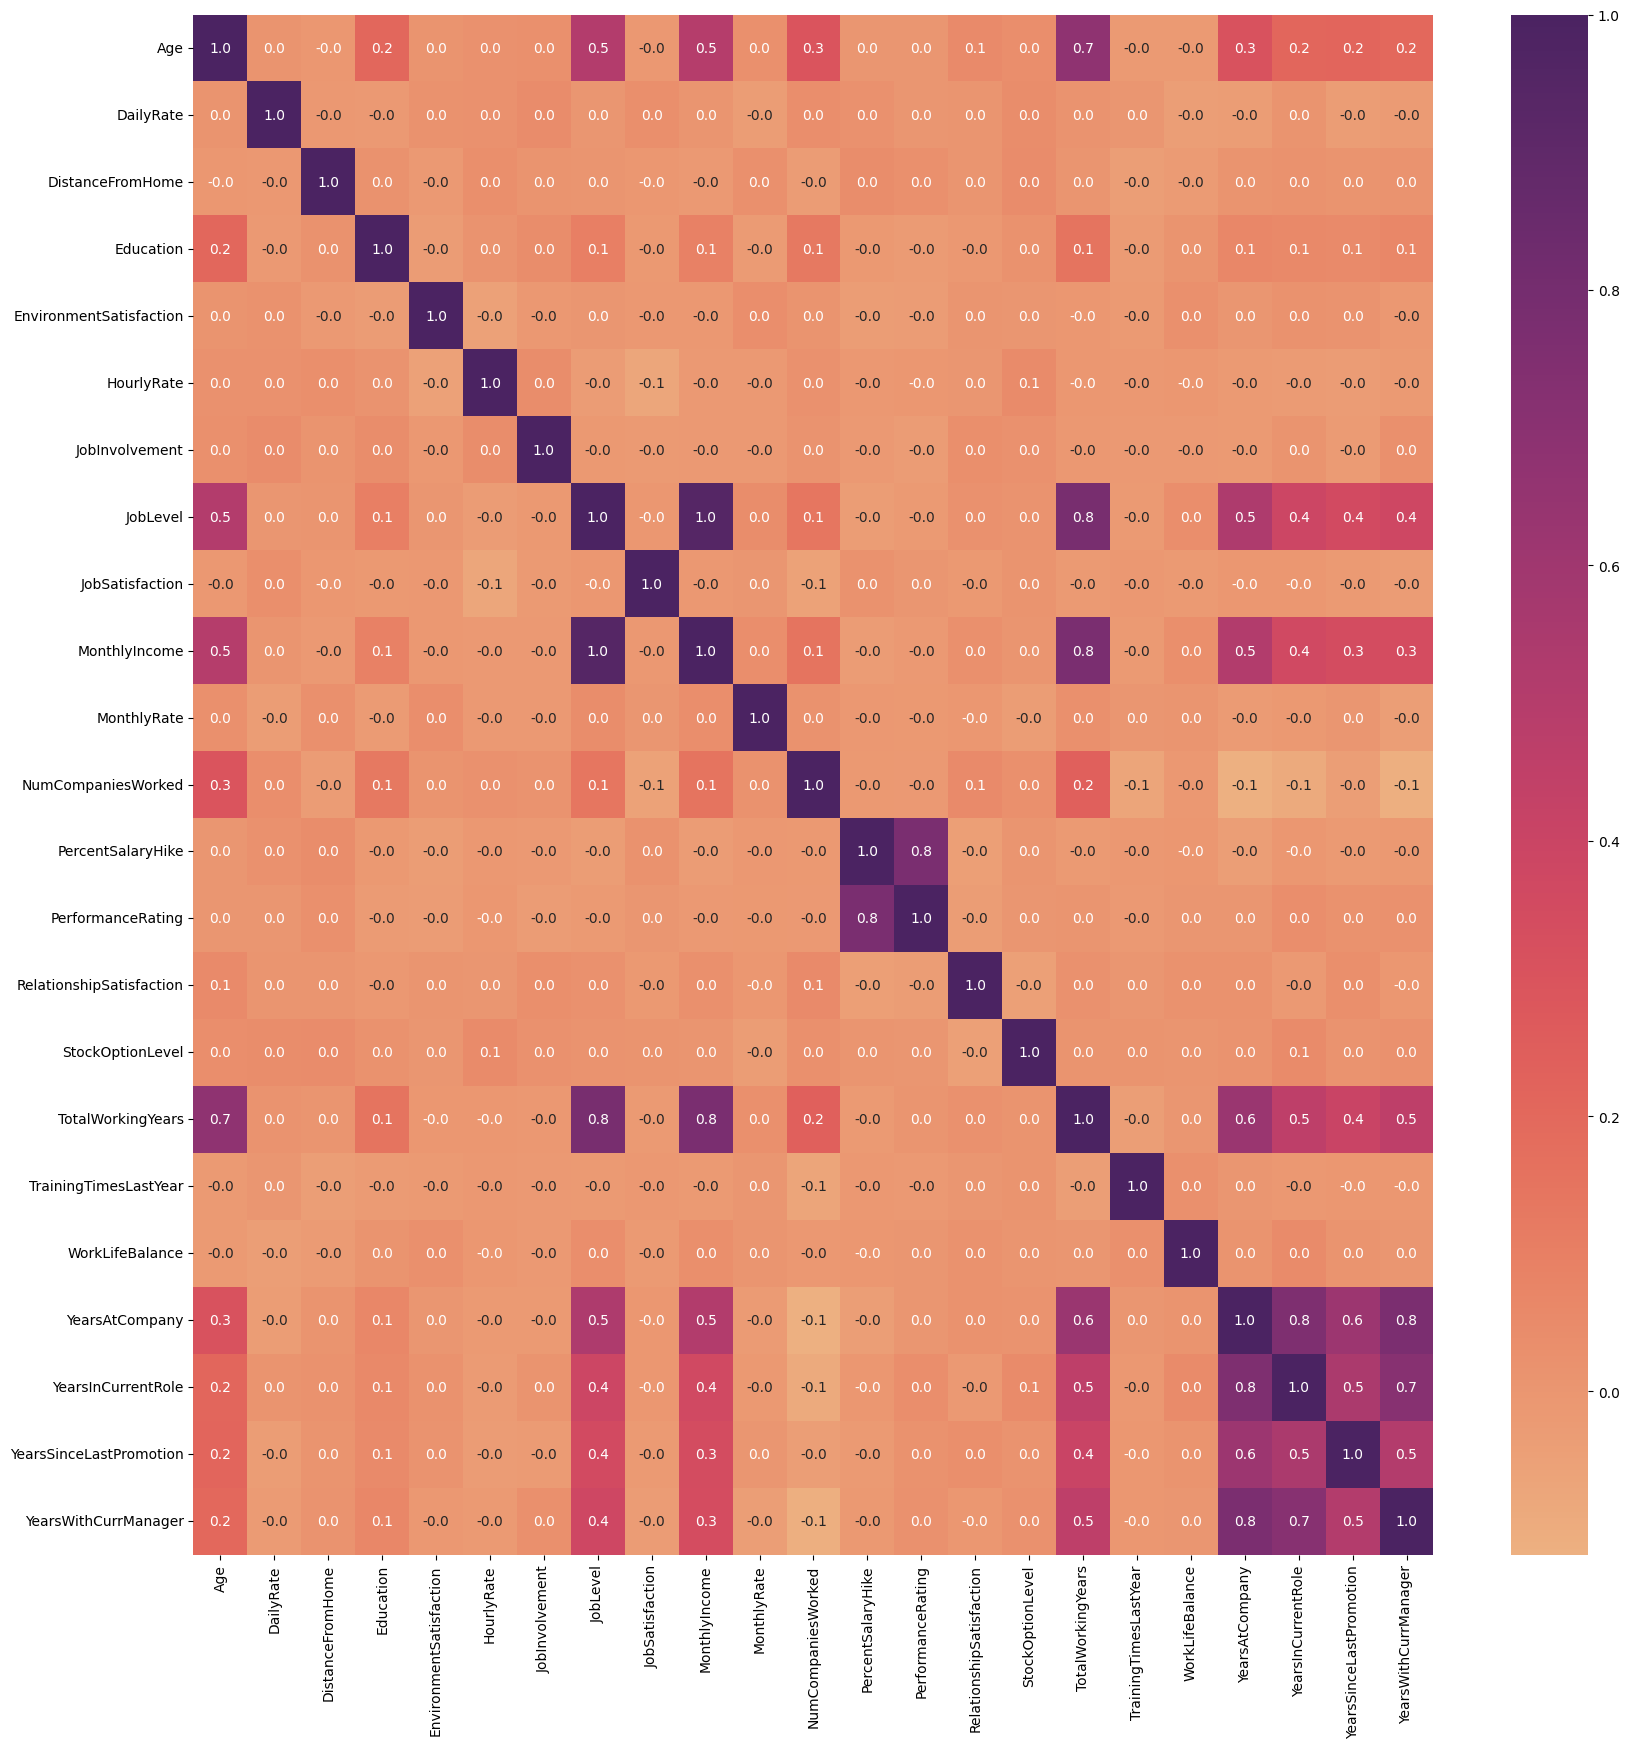

In [100]:
numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

plt.figure(figsize=(20, 20))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.1f')
plt.show()

Accuracy: 0.8673469387755102
Classification Report:
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Confusion Matrix:
 [[255   0]
 [ 39   0]]


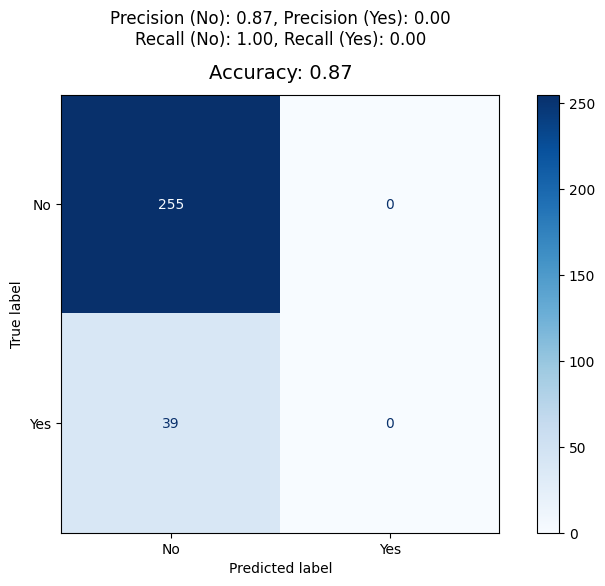

In [101]:

X = data.drop('Attrition', axis=1)
y = data['Attrition']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)
plt.tight_layout()
plt.show()


Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.36      0.13      0.19        39

    accuracy                           0.85       294
   macro avg       0.62      0.55      0.55       294
weighted avg       0.81      0.85      0.82       294

Confusion Matrix:
 [[246   9]
 [ 34   5]]


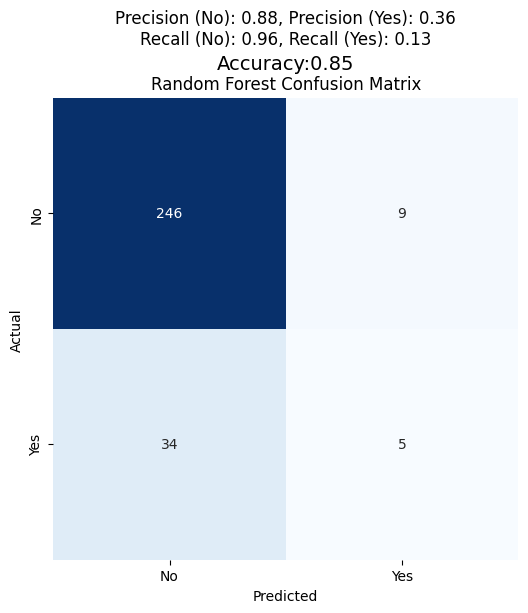

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train_encoded)

y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_rf.round())

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_rf.round()))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_rf.round()))

cm = confusion_matrix(y_test_encoded, y_pred_rf.round())

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False, ax=ax)

ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.text(0.5, 1.05, f"Accuracy:{accuracy:.2f}\n", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test_encoded, y_pred_rf.round(), output_dict=True)
report_text = f"Precision (No): {report['0']['precision']:.2f}, Precision (Yes): {report['1']['precision']:.2f}\n"
report_text += f"Recall (No): {report['0']['recall']:.2f}, Recall (Yes): {report['1']['recall']:.2f}"

ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()

Accuracy: 0.8673469387755102
Classification Report:
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Confusion Matrix:
 [[255   0]
 [ 39   0]]


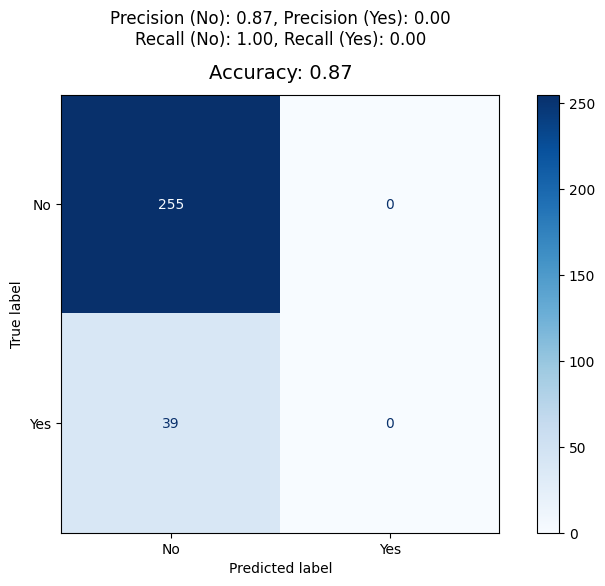

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')

ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()


Accuracy: 0.8673469387755102
Classification Report:
               precision    recall  f1-score   support

          No       0.87      1.00      0.93       255
         Yes       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

Confusion Matrix:
 [[255   0]
 [ 39   0]]


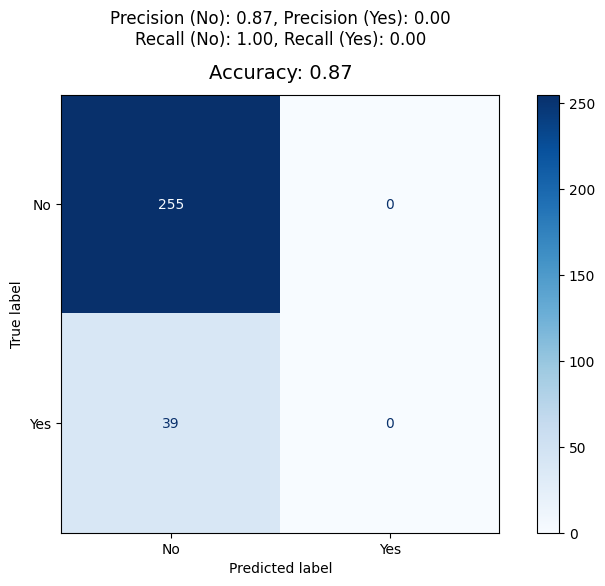

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = data.drop('Attrition', axis=1)
y = data['Attrition']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')

ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()


Accuracy: 0.7414965986394558
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       255
           1       0.16      0.23      0.19        39

    accuracy                           0.74       294
   macro avg       0.52      0.53      0.52       294
weighted avg       0.78      0.74      0.76       294

Confusion Matrix:
 [[209  46]
 [ 30   9]]


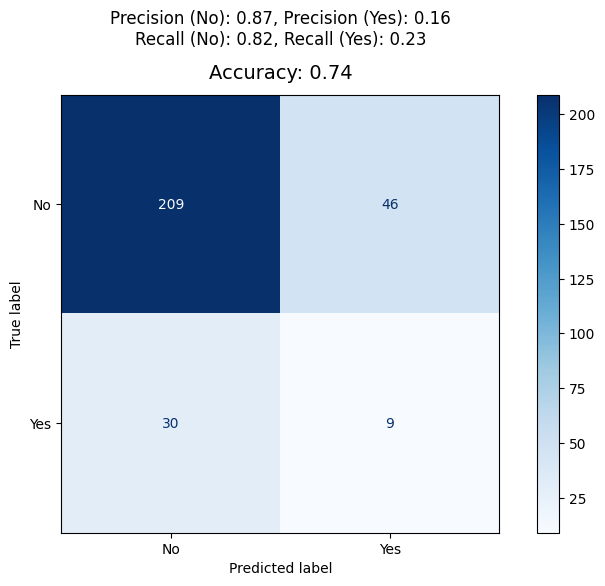

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train_encoded)

y_pred_dt_regressor = dt_regressor.predict(X_test)

y_pred_dt_regressor_labels = label_encoder.inverse_transform(y_pred_dt_regressor.round().astype(int))

accuracy = accuracy_score(y_test_encoded, y_pred_dt_regressor.round())
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_dt_regressor.round()))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_dt_regressor.round()))

cm = confusion_matrix(y_test_encoded, y_pred_dt_regressor.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test_encoded, y_pred_dt_regressor.round(), output_dict=True)
report_text = f"Precision (No): {report['0']['precision']:.2f}, Precision (Yes): {report['1']['precision']:.2f}\n"
report_text += f"Recall (No): {report['0']['recall']:.2f}, Recall (Yes): {report['1']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.show()


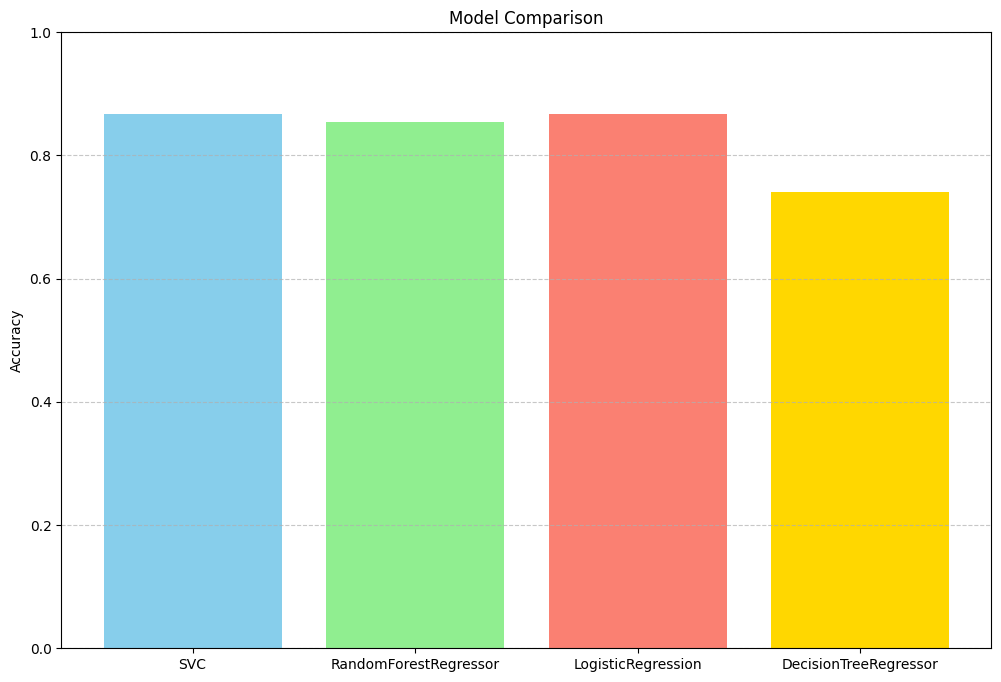

In [126]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model_names = ['SVC', 'RandomForestRegressor', 'LogisticRegression', 'DecisionTreeRegressor']
accuracies = [
    accuracy_score(y_test, y_pred), 
    accuracy_score(y_test_encoded, y_pred_rf.round()), 
    accuracy_score(y_test, y_pred), 
    accuracy_score(y_test_encoded, y_pred_dt_regressor.round())  
]

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightgrey']

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Accuracy: 0.8741496598639455
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294

Confusion Matrix:
 [[253   2]
 [ 35   4]]


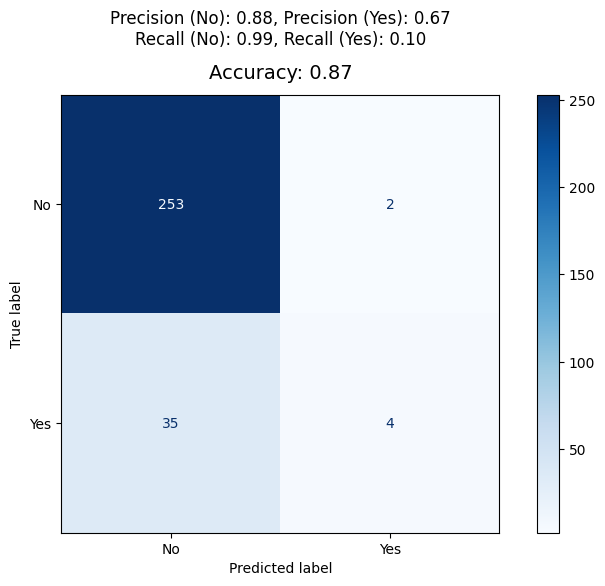

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf_classifier = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf_classifier)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf_classifier))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_classifier))

cm = confusion_matrix(y_test, y_pred_rf_classifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred_rf_classifier, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)
plt.tight_layout()
plt.show()


Accuracy: 0.7448979591836735
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.82      0.85       255
         Yes       0.17      0.23      0.19        39

    accuracy                           0.74       294
   macro avg       0.52      0.53      0.52       294
weighted avg       0.78      0.74      0.76       294

Confusion Matrix:
 [[210  45]
 [ 30   9]]


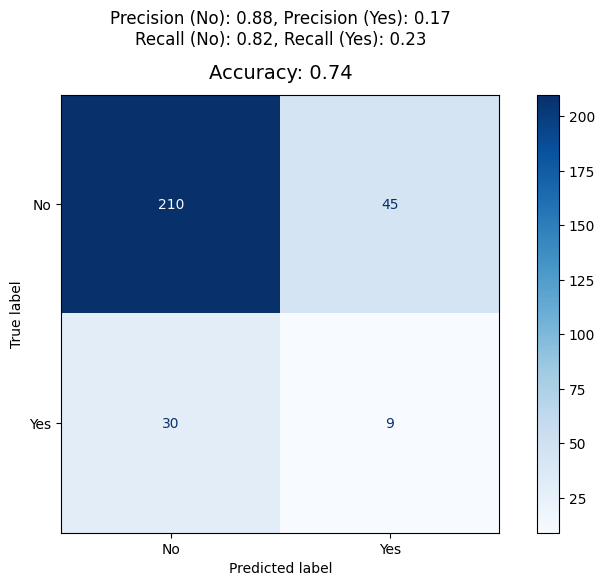

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred_dt, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)
plt.tight_layout()
plt.show()


Accuracy: 0.7244897959183674
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.74      0.82       255
         Yes       0.27      0.62      0.37        39

    accuracy                           0.72       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.84      0.72      0.76       294

Confusion Matrix:
 [[189  66]
 [ 15  24]]


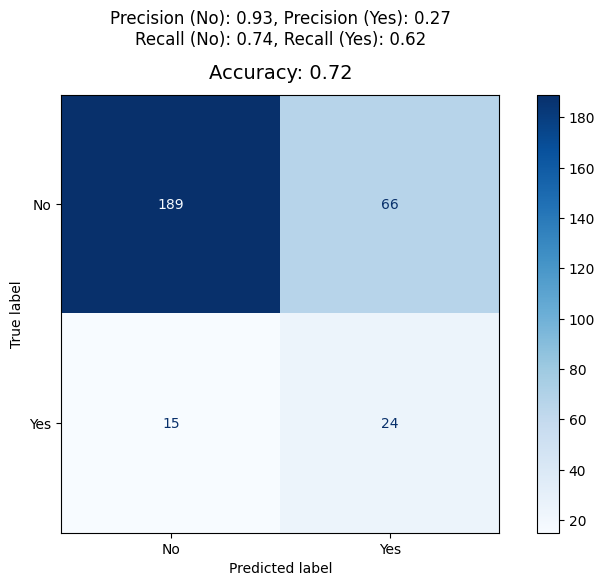

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)

y_pred_gnb = gnb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gnb)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred_gnb, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)
plt.tight_layout()
plt.show()


Accuracy: 0.8469387755102041
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.96      0.92       255
         Yes       0.31      0.13      0.18        39

    accuracy                           0.85       294
   macro avg       0.60      0.54      0.55       294
weighted avg       0.80      0.85      0.82       294

Confusion Matrix:
 [[244  11]
 [ 34   5]]


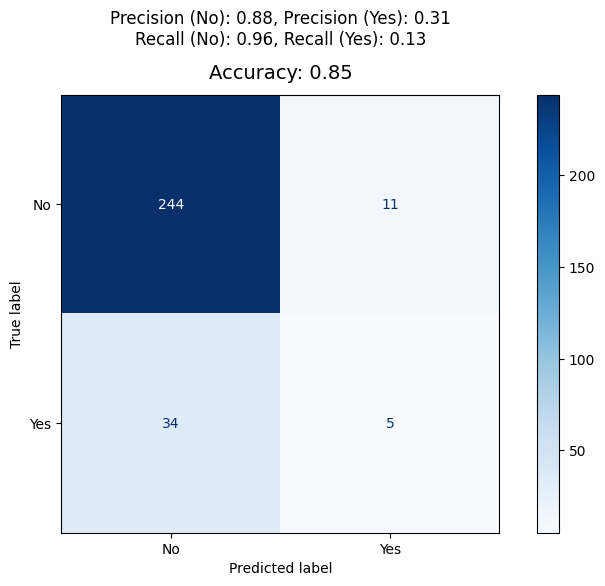

In [132]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.text(0.5, 1.05, f"Accuracy: {accuracy:.2f}", ha='center', va='center', transform=ax.transAxes, fontsize=14)

report = classification_report(y_test, y_pred_knn, output_dict=True)
report_text = f"Precision (No): {report['No']['precision']:.2f}, Precision (Yes): {report['Yes']['precision']:.2f}\n"
report_text += f"Recall (No): {report['No']['recall']:.2f}, Recall (Yes): {report['Yes']['recall']:.2f}"
ax.text(0.5, 1.15, report_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)
plt.tight_layout()
plt.show()


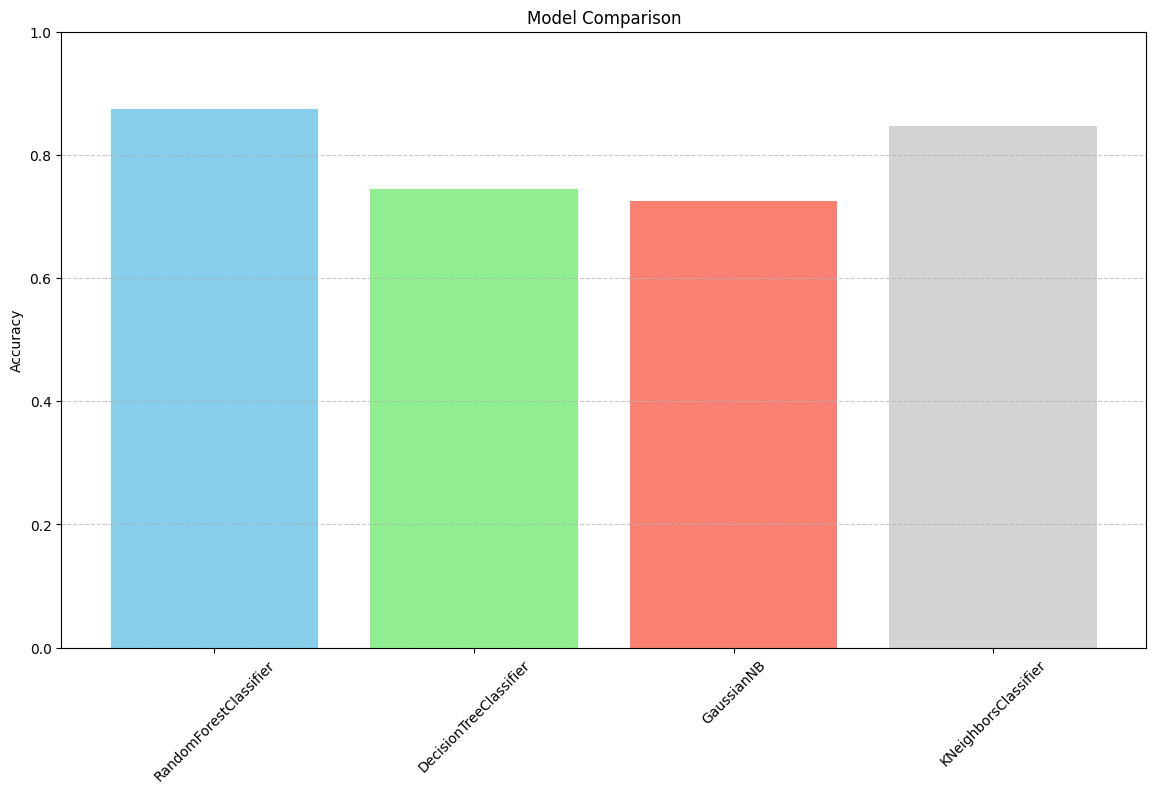

In [134]:

model_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighborsClassifier']
accuracies = [
    accuracy_score(y_test, y_pred_rf_classifier),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_gnb),
    accuracy_score(y_test, y_pred_knn)
]

colors = ['skyblue', 'lightgreen', 'salmon', 'lightgrey']

plt.figure(figsize=(14, 8))
plt.bar(model_names, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()